In [2]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

# Note: Some metrics need to be defined manually

In [3]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Rainfall_Forecast.csv')
# Colab
df = pd.read_csv('/content/AAPL-week1.csv')
df

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018/5/14,47.145000,46.577499,47.147499,45.957500
1,2018/5/21,47.560001,47.145000,46.577499,47.147499
2,2018/5/28,47.924999,47.560001,47.145000,46.577499
3,2018/6/4,47.209999,47.924999,47.560001,47.145000
4,2018/6/11,46.230000,47.209999,47.924999,47.560001
...,...,...,...,...,...
254,2023/3/27,164.660004,164.899994,160.250000,155.000000
255,2023/4/3,165.210007,164.660004,164.899994,160.250000
256,2023/4/10,165.020004,165.210007,164.660004,164.899994
257,2023/4/17,169.679993,165.020004,165.210007,164.660004


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Preparations for time-series data

Note: Pandas has a specific data type for time-series data

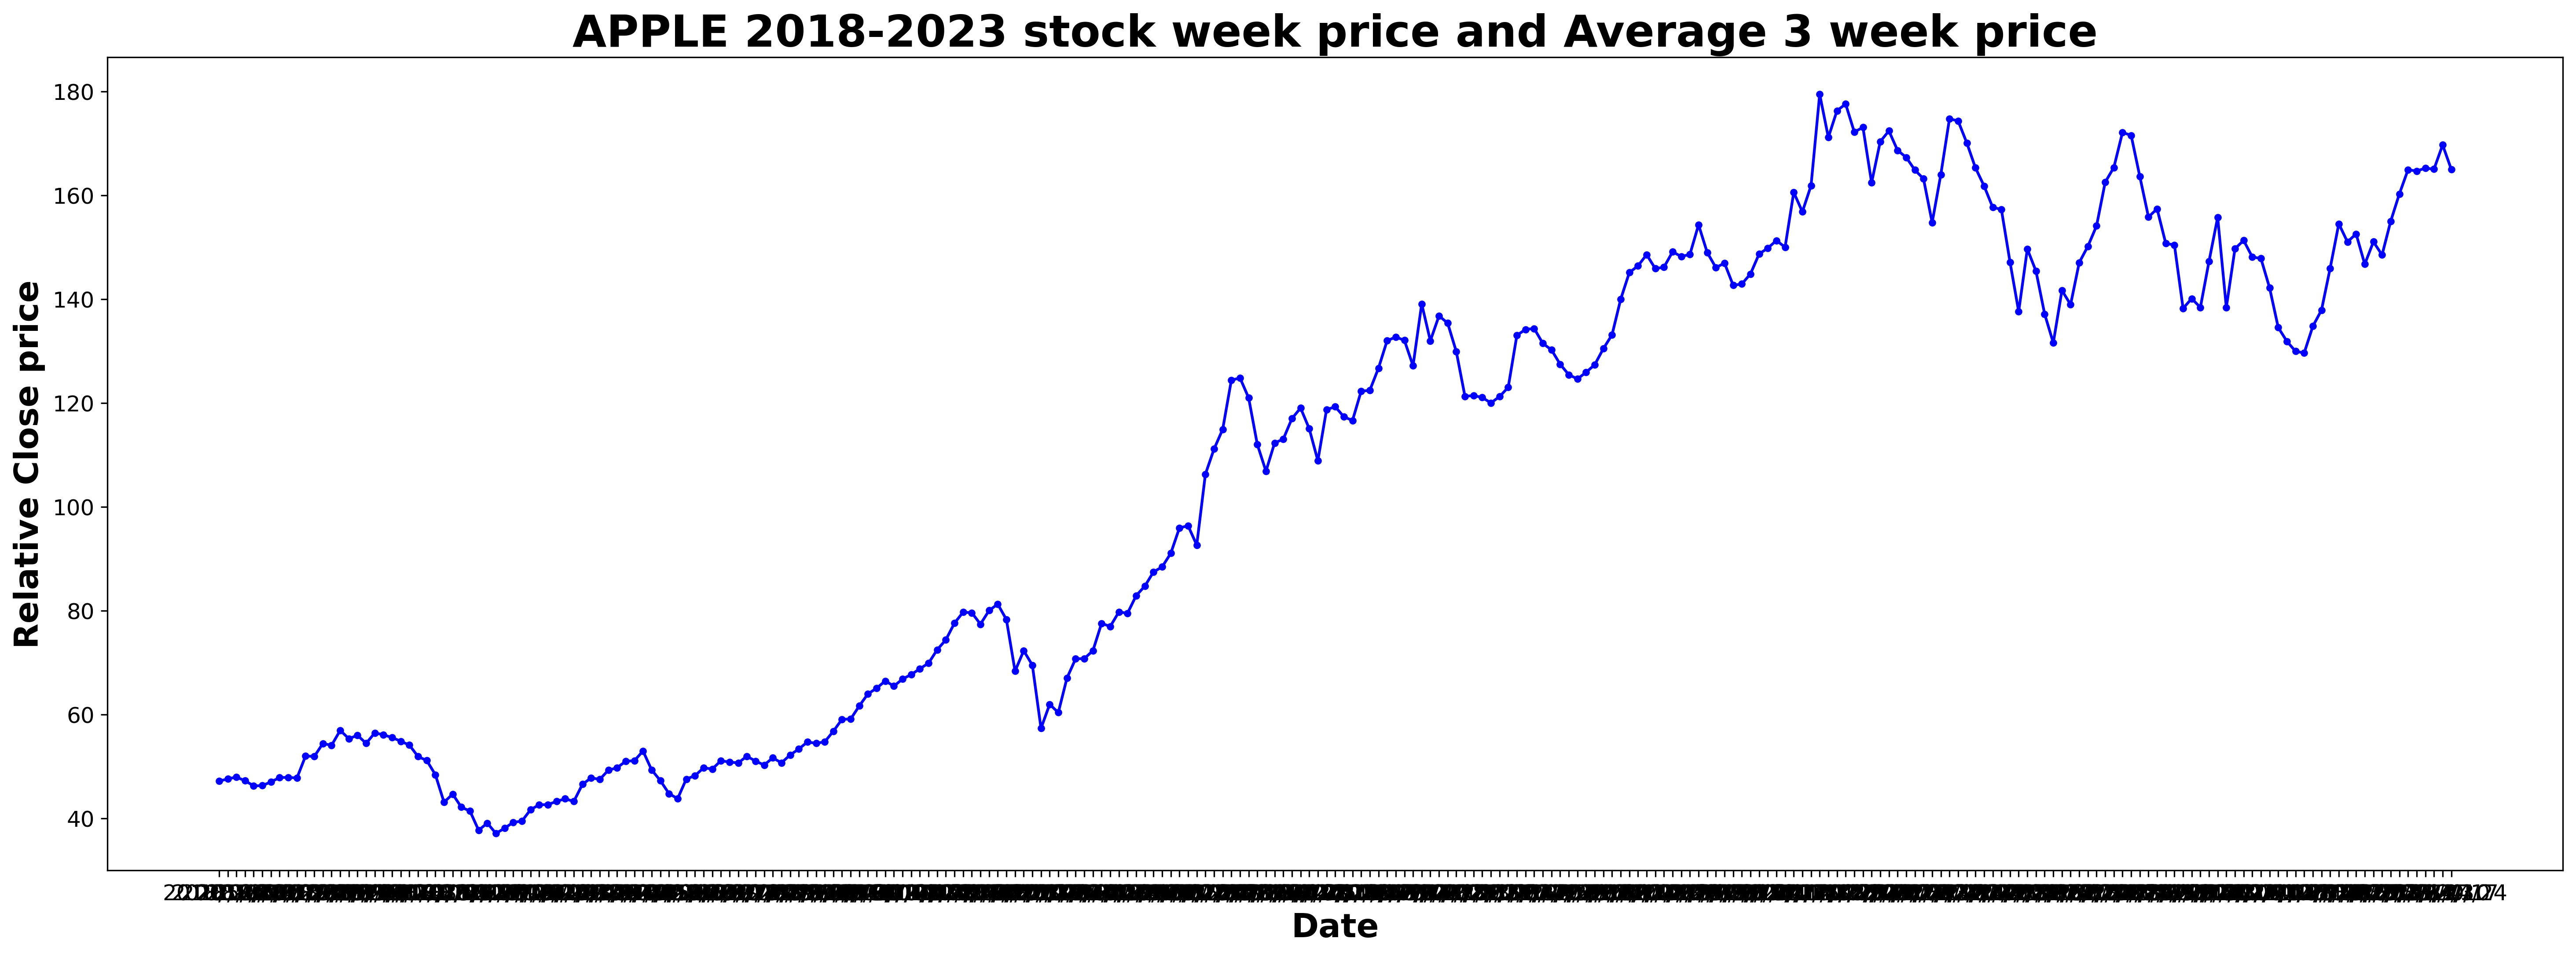

In [5]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('APPLE 2018-2023 stock week price and Average 3 week price',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Relative Close price',fontsize=18,weight='bold')

# Actual by predicted plot
plt.plot(df['Date'],df['Close'],marker='.',color='blue',label='每周收盤價')

#plt.plot(df['Date'],df['Avg3'],marker='.',color='green',label='前三周均價')

#plt.plot(label='每周收盤價',marker='.',color='blue')
#plt.plot(label='前三周均價',marker='.',color='green')

# Set the axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 2. Creating time lags as predictor variables

# Important!: Be caution when dealing with time-series data

python do have various packages and function that can deal with time-series data with ease, however, make sure that you understand the fundamental first!

In [6]:
# Drop out missing values and rest index
clean_df=df.dropna(axis=0, how='any').copy()
clean_df=clean_df.reset_index(drop=True)
clean_df

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018/5/14,47.145000,46.577499,47.147499,45.957500
1,2018/5/21,47.560001,47.145000,46.577499,47.147499
2,2018/5/28,47.924999,47.560001,47.145000,46.577499
3,2018/6/4,47.209999,47.924999,47.560001,47.145000
4,2018/6/11,46.230000,47.209999,47.924999,47.560001
...,...,...,...,...,...
254,2023/3/27,164.660004,164.899994,160.250000,155.000000
255,2023/4/3,165.210007,164.660004,164.899994,160.250000
256,2023/4/10,165.020004,165.210007,164.660004,164.899994
257,2023/4/17,169.679993,165.020004,165.210007,164.660004


# 3. Data preprocessing under time-series structure

A total of 21 years are in the data set. In this practice, we will use the last three years of data as the testing set

In [7]:
# Train data
Forecast_train_data=clean_df.iloc[0:207,:].copy()
#Forecast_train_data

In [8]:
# Test data
Forecast_test_data=clean_df.iloc[207:207+52,:].copy()
#Forecast_test_data

# 4. Prepare time-series data for train/validation structure manually

Here we have a total of 18 years of data in training data set that are ready to be further splitted into training and validation data set

18 years of data can be evenlly divided into 6 portions (3 years in each portion)

# Expanding window

In [9]:
# Expanding 1
Exp_training_1=Forecast_train_data.iloc[0:105,:].copy()
Exp_val_1=Forecast_train_data.iloc[105:105+34,:].copy()

# Expanding 2
Exp_training_2=Forecast_train_data.iloc[0:105+34,:].copy()
Exp_val_2=Forecast_train_data.iloc[105+34:105+34+34,:].copy()

# Expanding 3
Exp_training_3=Forecast_train_data.iloc[0:105+34+34,:].copy()
Exp_val_3=Forecast_train_data.iloc[105+34+34:105+34+34+34,:].copy()

#Exp_val_3

# Rolling window

In [10]:
# Rolling 1
Rol_training_1=Forecast_train_data.iloc[0:105,:].copy()
Rol_val_1=Forecast_train_data.iloc[105:105+34,:].copy()

# Rolling 2
Rol_training_2=Forecast_train_data.iloc[0:105+34,:].copy()
Rol_val_2=Forecast_train_data.iloc[105+34:105+34+34,:].copy()

# Rolling 3
Rol_training_3=Forecast_train_data.iloc[0:105+34+34,:].copy()
Rol_val_3=Forecast_train_data.iloc[105+34+34:105+34+34+34,:].copy()

#Rol_val_3

# 5. Set dependent variable(Y or target) & independent variable(X)

In [11]:
#set x (make prediction)
# Train
x_train=Exp_training_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 200))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['Lag_1','Lag_2','Lag_3']

# Validation
x_val=Exp_val_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 200))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train=Exp_training_3['Close'].copy()
y_val=Exp_val_3['Close'].copy()

#x_val

In [12]:
#set x (make prediction)
# Train
x_train=Rol_training_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 200))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['Lag_1','Lag_2','Lag_3']

# Validation
x_val=Rol_val_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 200))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train=Rol_training_1['Close'].copy()
y_val=Rol_val_1['Close'].copy()

#y_val

# 6. Creating Net

In [13]:
# Quick recap: Total of 12 features in the data set
scaled_x_train.head()

,Lag_1,Lag_2,Lag_3
0,43.069779,45.650570,40.262608
1,45.639256,43.069779,45.650570
2,47.518257,45.639256,43.069779
3,49.170860,47.518257,45.639256
4,45.933552,49.170860,47.518257


In [14]:
# Tips: Using shape to call the amount of features in the data set
input_features=scaled_x_train.shape[1]
print('Amount of features:',input_features)

Amount of features: 3


# Important: Define customized loss function (RMSE)

In [15]:
from keras.losses import mse
from keras.backend import sqrt

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects
get_custom_objects().update({'my_RMSE': my_RMSE})

Note: As far as I know when I'm preparing this in-class material, keras does not have a built-in RMSE function. Rumor has it that a RMSE function is hidden in the latest version, however it needs to be confirmed. For instance, defining RMSE ourself is not difficult, just don't forget to register our custom functions.

# Sequential style coding for creating net

In [17]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='relu'))
#model.add(Dropout(0.5))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))
#model.add(Dropout(0.5))

# 6.5 Add third hidden layer
model.add(Dense(units=48, activation='relu'))
#model.add(Dropout(0.5))

# 6.6 Add third hidden layer
model.add(Dense(units=96, activation='relu'))
#model.add(Dropout(0.5))

# 6.7 Add output layer
model.add(Dense(units=1, activation='relu'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dense_4 (Dense)             (None, 96)                4704      
                                                                 
 dense_5 (Dense)             (None, 1)                 97        
                                                                 
Total params: 6,421
Trainable params: 6,421
Non-trainabl

Note: Remember to clear the session or else some of the left neurans may cause trouble while fitting

# 7. Fit the model (train/validation)

In [18]:
# 7.1 Store in the history for more useful information
history=model.fit(scaled_x_train, y_train, epochs=100, batch_size=64,verbose=1,validation_data=(scaled_x_val, y_val))

Epoch 1/100
2/2 [==============================] - 1s 382ms/step - loss: 52.7966 - mean_absolute_percentage_error: 95.5991 - val_loss: 105.0381 - val_mean_absolute_percentage_error: 94.9688
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 50.8042 - mean_absolute_percentage_error: 92.3331 - val_loss: 102.2943 - val_mean_absolute_percentage_error: 92.6263
Epoch 3/100
2/2 [==============================] - 0s 64ms/step - loss: 48.8414 - mean_absolute_percentage_error: 89.0810 - val_loss: 99.5463 - val_mean_absolute_percentage_error: 90.2808
Epoch 4/100
2/2 [==============================] - 0s 66ms/step - loss: 46.8868 - mean_absolute_percentage_error: 85.7726 - val_loss: 96.6491 - val_mean_absolute_percentage_error: 87.8072
Epoch 5/100
2/2 [==============================] - 0s 64ms/step - loss: 44.6487 - mean_absolute_percentage_error: 82.1315 - val_loss: 93.5478 - val_mean_absolute_percentage_error: 85.1598
Epoch 6/100
2/2 [==============================] - 0s 46m

In [19]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

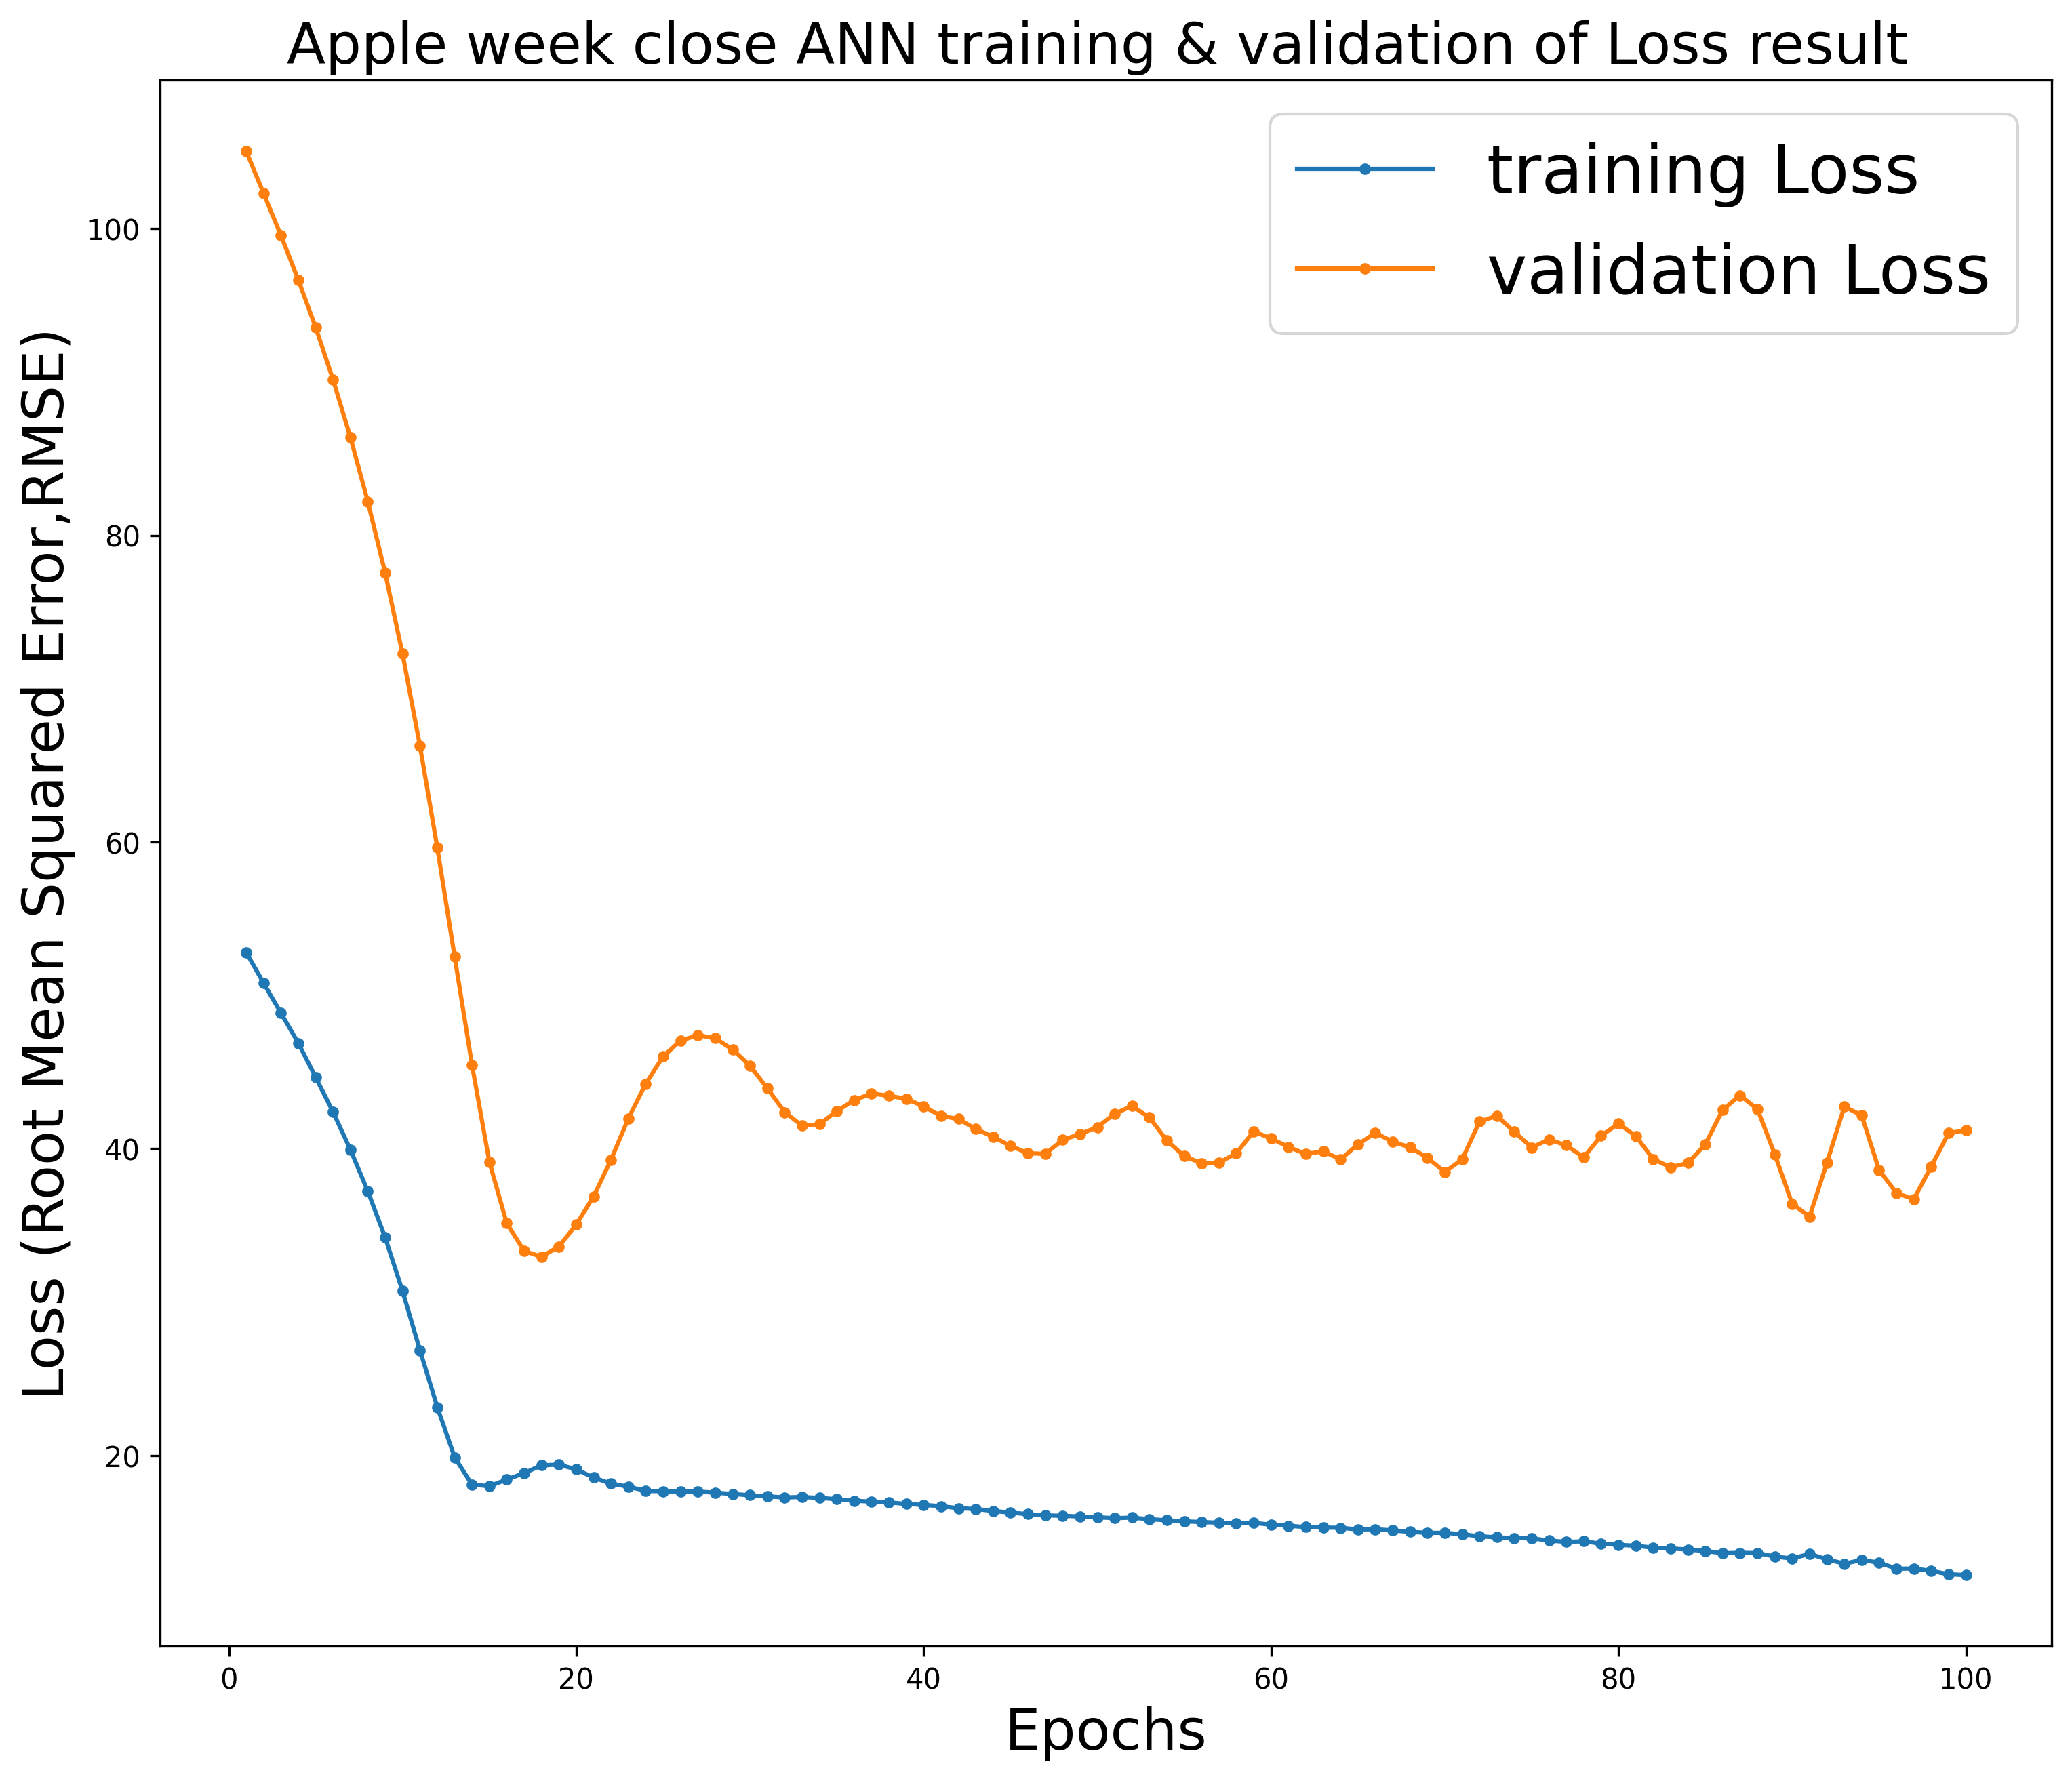

In [20]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('Apple week close ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

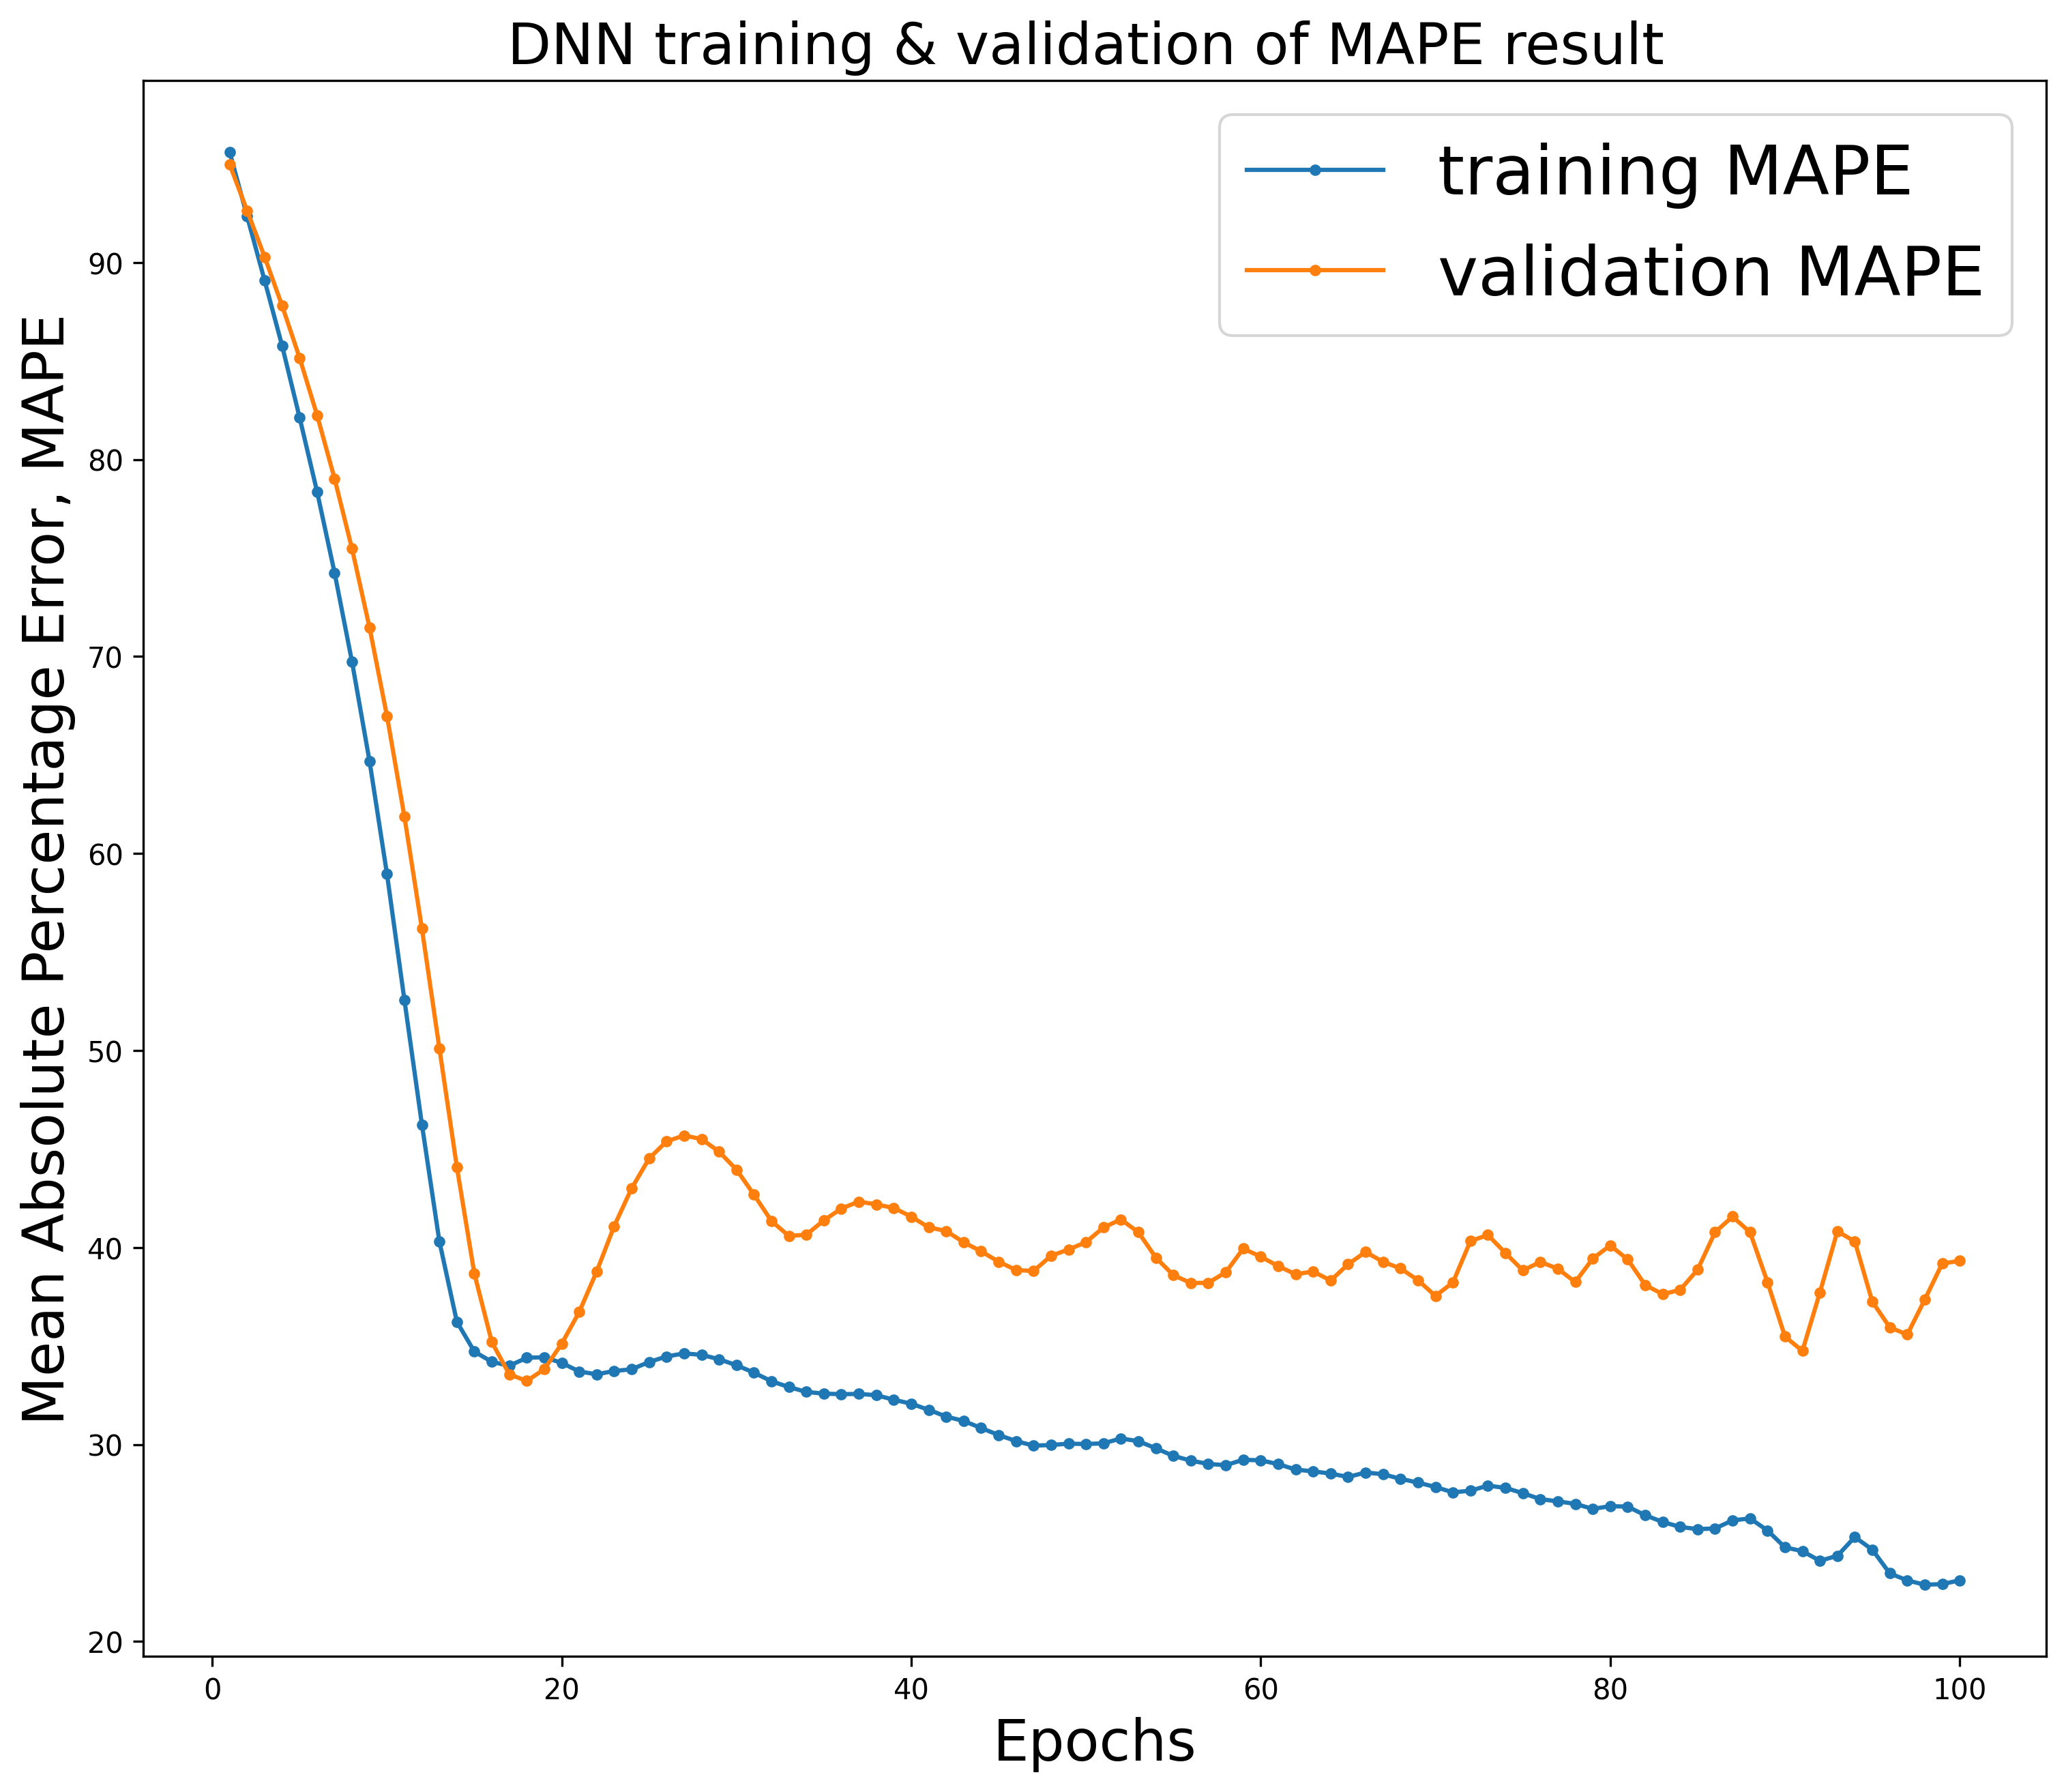

In [42]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

# Fit the final model with all of the training data

In [22]:
# X all train data
x_forecast_train=Forecast_train_data.drop(['Date','Close'],axis=1).copy()
# Y all train data
y_forecast_train=Forecast_train_data['Close'].copy()

In [31]:
# Create the model
clear.clear_session()
Fmodel=Sequential()

# Add input layer & first hidden layer
Fmodel.add(Dense(units=6, input_dim=3, activation='relu'))

# Add second hidden layer
Fmodel.add(Dense(units=12, activation='relu'))
#Fmodel.add(Dropout(0.5))

# Add third hidden layer
Fmodel.add(Dense(units=24, activation='relu'))
#Fmodel.add(Dropout(0.5))

# Add third hidden layer
Fmodel.add(Dense(units=48, activation='relu'))
#Fmodel.add(Dropout(0.5))

# Add third hidden layer
Fmodel.add(Dense(units=96, activation='relu'))
#Fmodel.add(Dropout(0.5))

# Add output layer
Fmodel.add(Dense(units=1, activation='relu'))

# Compile the defined Net
opt=Adam(learning_rate=0.005,beta_1=0.99,beta_2=0.999,epsilon=1e-8)
Fmodel.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model
Fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dense_4 (Dense)             (None, 96)                4704      
                                                                 
 dense_5 (Dense)             (None, 1)                 97        
                                                                 
Total params: 6,421
Trainable params: 6,421
Non-trainabl

In [32]:
# Store in the history for more useful information
history=Fmodel.fit(x_forecast_train, y_forecast_train, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 10ms/step - loss: 90.1602 - mean_absolute_percentage_error: 94.6496
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 68.4725 - mean_absolute_percentage_error: 71.8490
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 27.9376 - mean_absolute_percentage_error: 29.1833
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 24.3570 - mean_absolute_percentage_error: 26.4642
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 18.0633 - mean_absolute_percentage_error: 19.2894
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 10.2139 - mean_absolute_percentage_error: 10.7790
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 18.7037 - mean_absolute_percentage_error: 19.2012
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 14.8189 - mean_absolute_percentage_error: 15.2462
Epoch 9/100
4/4 [==============

In [33]:
# 7.3 Save the trained model
#Fmodel.save('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
Fmodel.save('House_Rent_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [34]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('/content/House_Rent_ANN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


# 8. Testing

In [35]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Close'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Close'].copy()

In [36]:
# 8.1 Make prediction
prediction=np.round((ANN_model.predict_on_batch(x_forecast_test)),2)
pred_values=[]
for i in range(0,len(prediction)):
    value=prediction[i][0]
    pred_values.append(value)

In [37]:
Results=pd.DataFrame({'Date':Forecast_test_data['Date'],'Y_true':Forecast_test_data['Close'],'Predict':pred_values})
Results['abs Error']=np.abs(Results['Y_true']-Results['Predict'])
Results

,Date,Y_true,Predict,abs Error
207,2022/5/2,147.110001,163.350006,16.240005
208,2022/5/9,137.589996,167.860001,30.270005
209,2022/5/16,149.639999,159.529999,9.890000
210,2022/5/23,145.380005,137.009995,8.370010
211,2022/5/30,137.130005,153.669998,16.539993
212,2022/6/6,131.559998,155.619995,24.059997
213,2022/6/13,141.660004,146.649994,4.989990
214,2022/6/20,138.929993,131.119995,7.809998
215,2022/6/27,147.039993,145.160004,1.879989
216,2022/7/4,150.169998,139.070007,11.099991


In [39]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [40]:
# 8.2 Calculating the mertics
MAE=mean_absolute_error(y_forecast_test,pred_values)
MSE=mean_squared_error(y_forecast_test,pred_values,squared=True)
RMSE=mean_squared_error(y_forecast_test,pred_values,squared=False)
MAPE=mean_absolute_percentage_error(y_forecast_test,pred_values)
SMAPE=SMAPE_calulate(y_forecast_test,pred_values)
RAE=RAE_calculate(y_forecast_test,pred_values)
MRAE=MRAE_calculate(y_forecast_test,pred_values)
MdRAE=MdRAE_calculate(y_forecast_test,pred_values)
RSE=RSE_calculate(y_forecast_test,pred_values,Root=False)
RRSE=RSE_calculate(y_forecast_test,pred_values,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 10.517
MSE: 158.833
RMSE: 12.603
MAPE: 7.172 %
SMAPE: 6.967 %
RAE: 1.156
MRAE: 0.022229455815242185
MdRAE: 1.319 bench: 149.718
RSE: 1.251
RRSE: 1.119


#  Plot for comparing true value & predicted value

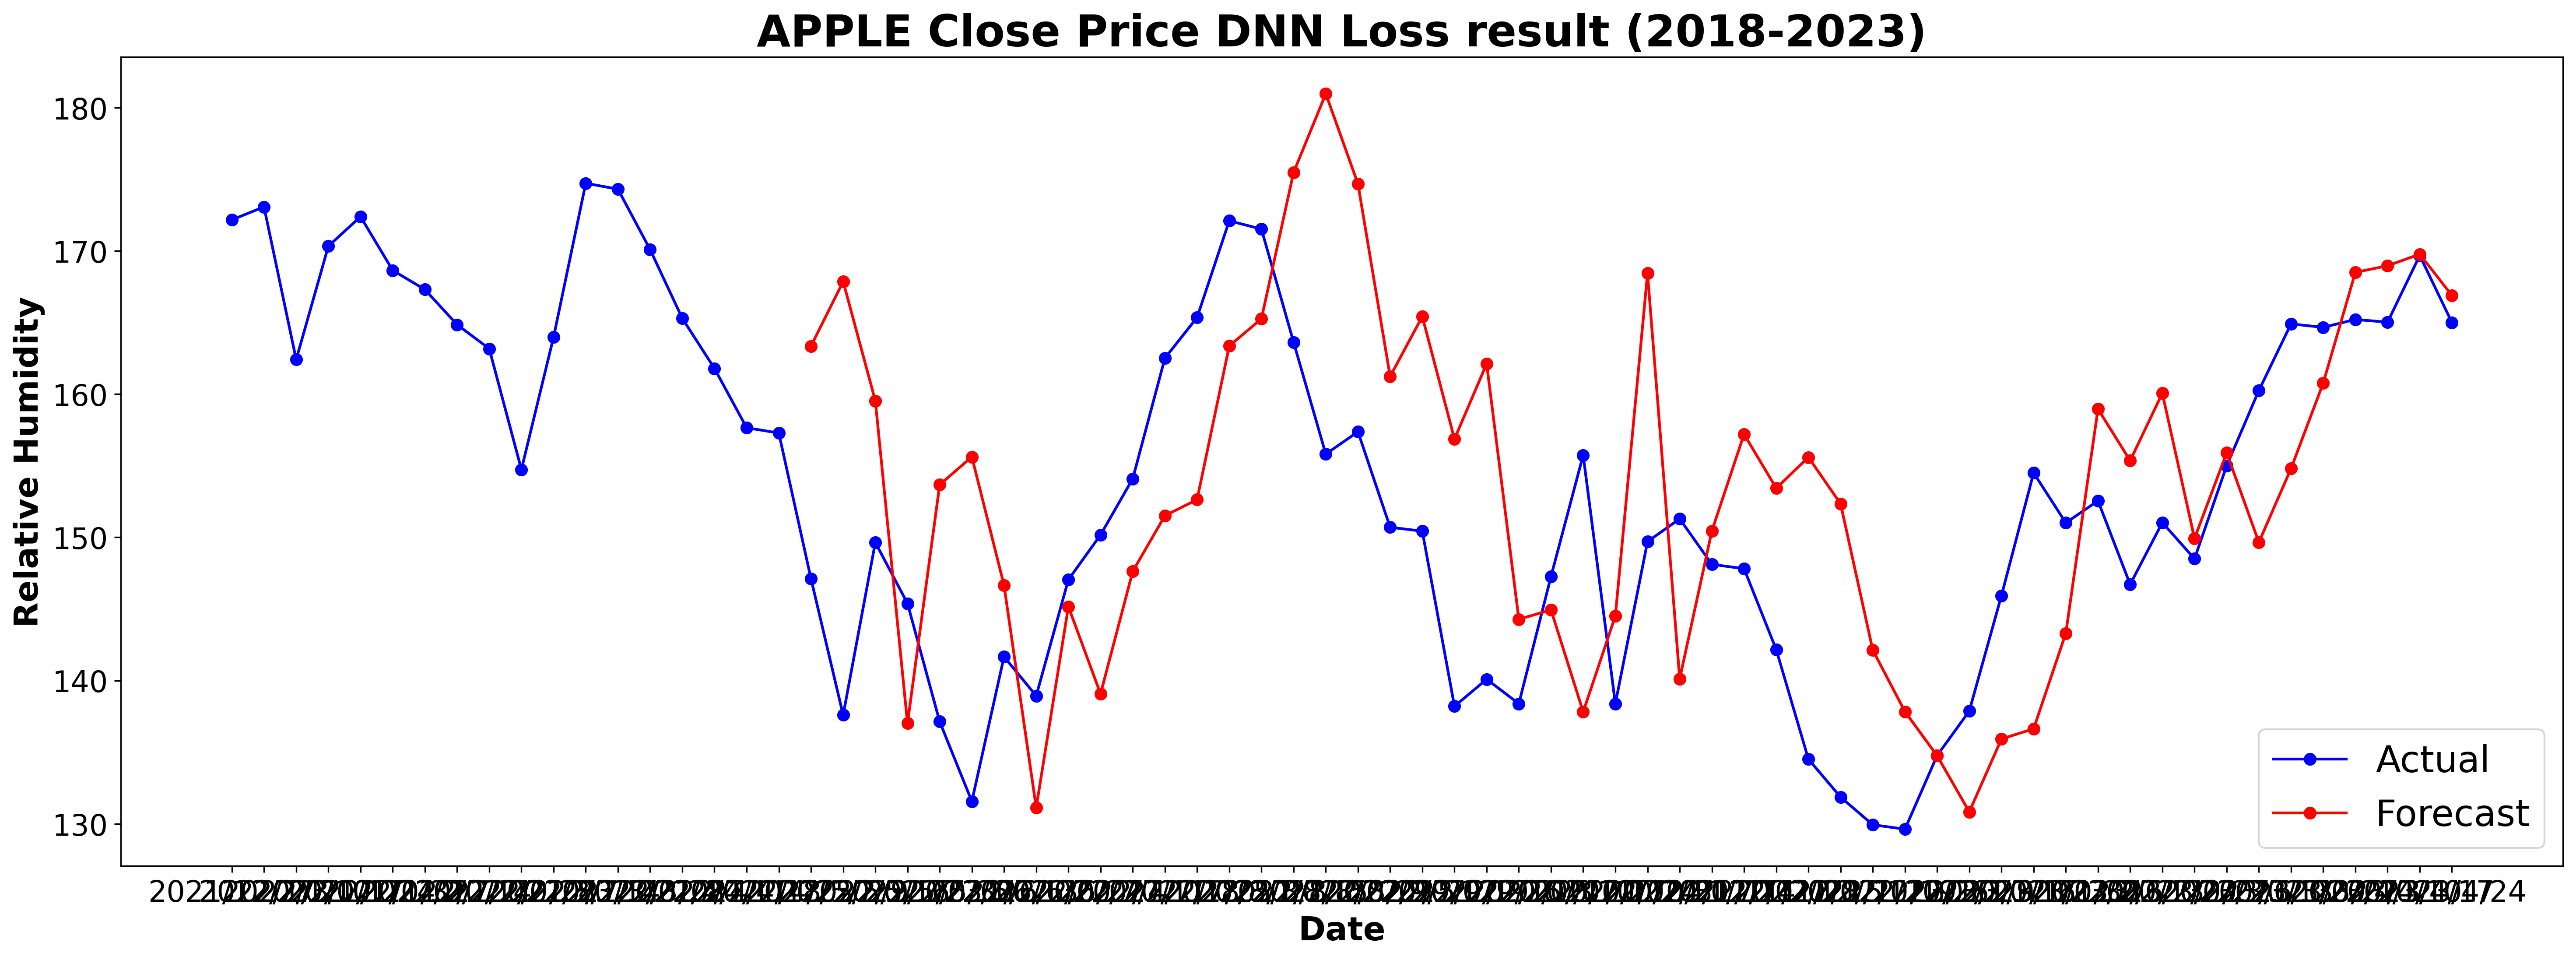

In [41]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('APPLE Close Price DNN Loss result (2018-2023)',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Relative Humidity',fontsize=18,weight='bold')

# Comparison of actual value and predicted value according to Date
plt.plot(clean_df.iloc[189:,0],clean_df.iloc[189:,1],marker='o',color='blue',label='Actual')
plt.plot(Results['Date'],Results['Predict'],marker='o',color='red',label='Forecast')

# Set the axis
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set legends
plt.legend(loc=4,fontsize=20)

plt.show()

# Actual by predicted plot